In [14]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
warnings.filterwarnings(action='ignore')
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

11501568/11490434 [==============================] - 1s 0us/step


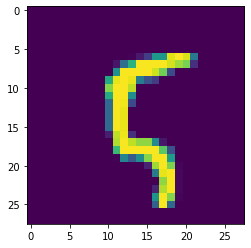

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(X_train[100])

In [8]:
print(X_train[2].dtype)
print(X_train.dtype, y_train.dtype)

X_train, X_test = X_train.astype("float32"), tf.cast(X_test, tf.float32)
print(X_train.dtype, X_test.dtype)

float32
float32 uint8
float32 <dtype: 'float32'>


In [9]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [15]:
num_classes = 10
num_features = X_train.shape[1] * X_train.shape[2] # 28*28 = 784
X_train, X_test = tf.reshape(X_train, [-1, num_features]), tf.reshape(X_test, [-1, num_features])
print(X_train.shape)

2022-07-26 15:26:23.276102: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 179.44MiB (rounded to 188160000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-07-26 15:26:23.276163: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-07-26 15:26:23.276188: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 3, Chunks in use: 3. 768B allocated for chunks. 768B in use in bin. 48B client-requested in use in bin.
2022-07-26 15:26:23.276204: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 1, Chunks in use: 0. 512B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-07-26 15:26:23.276222: I tensorflow/core/commo

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

26 15:26:23.276404: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (4194304): 	Total Chunks: 1, Chunks in use: 0. 7.39MiB allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-07-26 15:26:23.276419: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (8388608): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-07-26 15:26:23.276438: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (16777216): 	Total Chunks: 1, Chunks in use: 1. 29.91MiB allocated for chunks. 29.91MiB in use in bin. 29.91MiB client-requested in use in bin.
2022-07-26 15:26:23.276453: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (33554432): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-07-26 15:26:23.276468: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (67108864): 	Total Chunks: 0, Chunks in use

In [11]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([num_features, num_classes]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([num_classes]))
print(W)

def softmax_transformation(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth= num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, axis=1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[-1.1012203 ,  1.5457517 ,  0.383644  , ..., -0.20326038,
        -0.5581562 , -0.7205441 ],
       [-0.6259924 , -0.71502596, -0.34835446, ..., -0.02147583,
        -0.31968883,  0.37332553],
       [ 0.25279108,  0.6437664 ,  2.1463082 , ...,  0.05864959,
        -0.49213138, -0.81997806],
       ...,
       [-0.65812045, -0.15267812,  1.6455383 , ..., -0.6151249 ,
        -0.27934095,  0.6741787 ],
       [-0.27168775, -1.0186273 ,  0.16641715, ..., -1.1966426 ,
         0.59222376,  1.057379  ],
       [-1.2563094 , -1.8102465 , -0.5165217 , ..., -0.31224605,
        -0.45363447, -0.6763898 ]], dtype=float32)>


In [19]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

2022-07-26 15:34:53.521893: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 179.44MiB (rounded to 188160000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-07-26 15:34:53.521945: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-07-26 15:34:53.521969: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 3, Chunks in use: 3. 768B allocated for chunks. 768B in use in bin. 48B client-requested in use in bin.
2022-07-26 15:34:53.521981: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 1, Chunks in use: 0. 512B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-07-26 15:34:53.521994: I tensorflow/core/commo

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [17]:
lr = 0.005
optimizer = tf.optimizers.SGD(lr)

def run_optimization():
    with tf.GradientTape() as g:
        pred = softmax_transformation(x)
        loss = cross_entropy(pred, y)
        
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [18]:
num_epoch = 4
display_step = 100

for epoch in range(num_epoch):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)
        
        if step % display_step == 0:
            pred = softmax_transformation(batch_x)
            loss = cross_entropy(pred, batch_y)
            acc = accuracy(pred, batch_y)
            
            print(f"epoch: {epoch}, step: {step}, loss: {loss.numpy()}, acc: {acc.numpy()}")

NameError: name 'train_data' is not defined